# <font color = 'Green'>Python_Programming_Neural_Networks_CNN</font>

**2. Next, do the same for the CNN architectures. Try (sequentially) three different configurations, train your models and then report the results on the validation dataset..**

In [34]:
#Import Required Libraries
from __future__ import print_function
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
%matplotlib inline

In [13]:
#Split Data Into Train and Test Sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
#Print Split Shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [15]:
print(y_train[0])

5


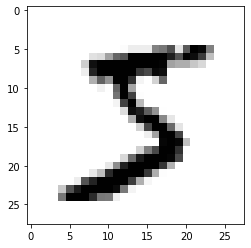

In [16]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [17]:
#Reshaping Data for Neural Networks
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [18]:
#Build Categorical Matrix on Y column
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [19]:
batch_size = 128
num_classes = 10
epochs = 3

#Input Image Dimensions
img_rows, img_cols = 28, 28

In [20]:
#Split the Data and Channelling Followed by Reshaping
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

#Convert Class Vectors to Binary Class Matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 1st Model

In [21]:
#Layering for Neural Networks
model = Sequential()
model.add(Conv2D(100, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
#Model Encoding
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [23]:
#Fitting Model
model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
469/469 [==============================] - 47s 100ms/step - loss: 0.4823 - accuracy: 0.8473 - val_loss: 0.0800 - val_accuracy: 0.9740
Epoch 2/3
469/469 [==============================] - 47s 100ms/step - loss: 0.1927 - accuracy: 0.9442 - val_loss: 0.0539 - val_accuracy: 0.9822
Epoch 3/3
469/469 [==============================] - 48s 103ms/step - loss: 0.1479 - accuracy: 0.9577 - val_loss: 0.0399 - val_accuracy: 0.9869


In [24]:
#Scoring Model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 0.03992607444524765
Test accuracy: 0.9868999719619751


## 2nd Model

In [26]:
#Layering for Neural Networks
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [27]:
#Model Encoding
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [28]:
#Fitting Model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
469/469 [==============================] - 41s 88ms/step - loss: 2.2806 - accuracy: 0.1525 - val_loss: 2.2430 - val_accuracy: 0.2862
Epoch 2/3
469/469 [==============================] - 41s 88ms/step - loss: 2.2212 - accuracy: 0.2490 - val_loss: 2.1716 - val_accuracy: 0.4243
Epoch 3/3
469/469 [==============================] - 42s 90ms/step - loss: 2.1455 - accuracy: 0.3459 - val_loss: 2.0738 - val_accuracy: 0.5668


In [29]:
#Scoring Model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 2.073773145675659
Test accuracy: 0.5667999982833862


**From the results we see that the Model is Under fitting**

## 3rd Model

In [30]:
#Layering for Neural Networks
model = Sequential()
model.add(Conv2D(150, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(75, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
#Model Encoding
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [32]:
#Fitting Model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
469/469 [==============================] - 133s 284ms/step - loss: 0.2987 - accuracy: 0.9080 - val_loss: 0.0681 - val_accuracy: 0.9775
Epoch 2/3
469/469 [==============================] - 136s 291ms/step - loss: 0.1234 - accuracy: 0.9643 - val_loss: 0.0521 - val_accuracy: 0.9846
Epoch 3/3
469/469 [==============================] - 140s 299ms/step - loss: 0.0954 - accuracy: 0.9724 - val_loss: 0.0434 - val_accuracy: 0.9870


In [33]:
#Scoring Model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 0.043386779725551605
Test accuracy: 0.9869999885559082


**From the results Model 3 has the Lowest Test loss and similar Accuracy. So, we can select this model for our data.**

## Question #3

**3. Which of these two architectures helped in predicting images from the MNIST image dataset better? Search on google and identify some other architectures that have been used for building accurate deep learning models on the same MNIST image database. Briefly (using comments in your code, or answered as ‘markdown’, explain what you found in terms of other architectures for image classification that have done well in this dataset).**

Convolutional neural network training is based on trial and error. This makes experiments challenging because the results we obtain are different each time. From my results, there is a significant difference between train and test accuracies but overall using a Neural Network model gives the highest accuracy. So, we have to run the experiment multiple times. By searching around on Google, I have found the optimal CNN architecture for classifying MNIST handwritten digits. 

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. Chosen 32 filters for the two firsts conv2D layers and 64 filters for the two second layers and 128 filters for two third layers and 256 for the last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is used to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

Adding batch normalization and data augmentation to the CNN also improves the results. The best way is to use the features in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.